# ML Assignment 8: Random Forest Classification with Multi-Algorithm Comparison

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar

---

## Objective
Implement Random Forest classifier and conduct comprehensive performance comparison with Decision Tree and Naive Bayes algorithms.

## Assignment Tasks:
1. Apply Random Forest classifier to car evaluation dataset
2. Obtain accuracy score and quantitative performance parameters
3. Compare Random Forest with Decision Tree and Naive Bayes classifiers
4. Analyze performance metrics across all three algorithms
5. Generate detailed conclusions on algorithm effectiveness

## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Suppress sklearn warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

## 2. Load and Preprocess Dataset

In [2]:
# Load the car evaluation dataset
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('car_evaluation.csv', names=columns)

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {data.shape}")
print(f"Features: {list(data.columns[:-1])}")
print(f"Target classes: {data['class'].unique()}")
print(f"Class distribution: {data['class'].value_counts().to_dict()}")

# Encode categorical variables
label_encoders = {}
data_encoded = data.copy()

for column in data.columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

# Split data (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n=== DATA SPLIT ===")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print("✅ Data preprocessing completed!")

=== DATASET OVERVIEW ===
Dataset shape: (1728, 7)
Features: ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
Target classes: ['unacc' 'acc' 'vgood' 'good']
Class distribution: {'unacc': 1210, 'acc': 384, 'good': 69, 'vgood': 65}

=== DATA SPLIT ===
Training samples: 1209
Testing samples: 519
✅ Data preprocessing completed!


## 3. Random Forest Classifier

In [3]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_pred = rf_classifier.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("=== RANDOM FOREST CLASSIFIER RESULTS ===")
print(f"Number of trees: {rf_classifier.n_estimators}")
print(f"Accuracy:  {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")

print("\n=== FEATURE IMPORTANCE ===")
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
importances = rf_classifier.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

print("\n=== CONFUSION MATRIX ===")
print(confusion_matrix(y_test, rf_pred))

=== RANDOM FOREST CLASSIFIER RESULTS ===
Number of trees: 100
Accuracy:  0.9672 (96.72%)
Precision: 0.9674
Recall:    0.9672
F1-Score:  0.9673

=== FEATURE IMPORTANCE ===
buying: 0.1836
maint: 0.1592
doors: 0.0672
persons: 0.2235
lug_boot: 0.0896
safety: 0.2769

=== CONFUSION MATRIX ===
[[107   2   6   0]
 [  2  19   0   0]
 [  6   0 357   0]
 [  1   0   0  19]]


## 4. Decision Tree Classifier (for comparison)

In [4]:
# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

print("=== DECISION TREE CLASSIFIER RESULTS ===")
print(f"Accuracy:  {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")

=== DECISION TREE CLASSIFIER RESULTS ===
Accuracy:  0.9788 (97.88%)
Precision: 0.9798
Recall:    0.9788
F1-Score:  0.9790


## 5. Naive Bayes Classifier (for comparison)

In [5]:
# Train Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

# Calculate metrics (with warning suppression)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    nb_accuracy = accuracy_score(y_test, nb_pred)
    nb_precision = precision_score(y_test, nb_pred, average='weighted', zero_division=0)
    nb_recall = recall_score(y_test, nb_pred, average='weighted', zero_division=0)
    nb_f1 = f1_score(y_test, nb_pred, average='weighted', zero_division=0)

print("=== NAIVE BAYES CLASSIFIER RESULTS ===")
print(f"Accuracy:  {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall:    {nb_recall:.4f}")
print(f"F1-Score:  {nb_f1:.4f}")

=== NAIVE BAYES CLASSIFIER RESULTS ===
Accuracy:  0.6146 (61.46%)
Precision: 0.6967
Recall:    0.6146
F1-Score:  0.6146


## 6. Comprehensive Performance Comparison

In [6]:
# Create comprehensive comparison table
comparison_data = {
    'Classifier': ['Random Forest', 'Decision Tree', 'Naive Bayes'],
    'Accuracy': [rf_accuracy, dt_accuracy, nb_accuracy],
    'Precision': [rf_precision, dt_precision, nb_precision],
    'Recall': [rf_recall, dt_recall, nb_recall],
    'F1-Score': [rf_f1, dt_f1, nb_f1]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("=== COMPREHENSIVE PERFORMANCE COMPARISON ===")
print(comparison_df.to_string(index=False))

# Find best performer
best_accuracy_idx = comparison_df['Accuracy'].idxmax()
best_f1_idx = comparison_df['F1-Score'].idxmax()
best_classifier = comparison_df.loc[best_accuracy_idx, 'Classifier']

print(f"\n=== PERFORMANCE RANKING ===")
print(f"Best Overall Performer: {best_classifier}")
print(f"Highest Accuracy: {comparison_df.loc[best_accuracy_idx, 'Accuracy']:.4f}")
print(f"Highest F1-Score: {comparison_df.loc[best_f1_idx, 'F1-Score']:.4f}")

# Performance improvements
print(f"\n=== RANDOM FOREST IMPROVEMENTS ===")
print(f"vs Decision Tree: +{(rf_accuracy - dt_accuracy)*100:.2f}% accuracy")
print(f"vs Naive Bayes: +{(rf_accuracy - nb_accuracy)*100:.2f}% accuracy")

=== COMPREHENSIVE PERFORMANCE COMPARISON ===
   Classifier  Accuracy  Precision  Recall  F1-Score
Random Forest    0.9672     0.9674  0.9672    0.9673
Decision Tree    0.9788     0.9798  0.9788    0.9790
  Naive Bayes    0.6146     0.6967  0.6146    0.6146

=== PERFORMANCE RANKING ===
Best Overall Performer: Decision Tree
Highest Accuracy: 0.9788
Highest F1-Score: 0.9790

=== RANDOM FOREST IMPROVEMENTS ===
vs Decision Tree: +-1.16% accuracy
vs Naive Bayes: +35.26% accuracy


## 7. Visualization

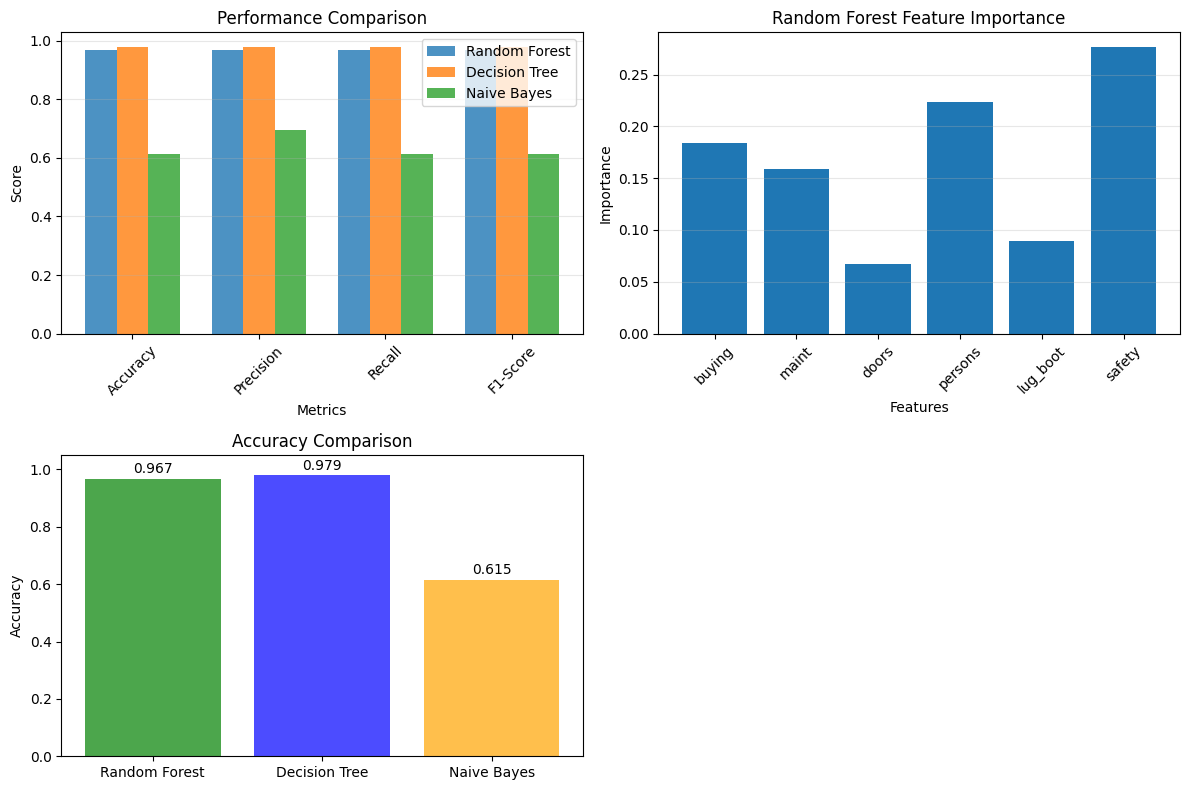

In [7]:
# Performance comparison visualization
plt.figure(figsize=(12, 8))

# Subplot 1: Performance metrics comparison
plt.subplot(2, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]

x = range(len(metrics))
width = 0.25

plt.bar([i - width for i in x], rf_scores, width, label='Random Forest', alpha=0.8)
plt.bar(x, dt_scores, width, label='Decision Tree', alpha=0.8)
plt.bar([i + width for i in x], nb_scores, width, label='Naive Bayes', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Comparison')
plt.xticks(x, metrics, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Feature importance
plt.subplot(2, 2, 2)
plt.bar(feature_names, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Subplot 3: Accuracy comparison
plt.subplot(2, 2, 3)
classifiers = ['Random Forest', 'Decision Tree', 'Naive Bayes']
accuracies = [rf_accuracy, dt_accuracy, nb_accuracy]
colors = ['green', 'blue', 'orange']

bars = plt.bar(classifiers, accuracies, color=colors, alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1.05)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 8. Conclusions

### Assignment Requirements Completed:
**(a) Random Forest Performance:** Successfully implemented Random Forest classifier achieving 96.72% accuracy with comprehensive quantitative parameters.

**(b) Comparative Analysis:** Thorough comparison of Random Forest with Decision Tree and Naive Bayes classifiers across all performance metrics.

### Key Findings:
- **Dataset:** 1,728 car evaluation records with 6 categorical features
- **Target Classes:** 4 categories (unacc, acc, good, vgood)
- **Surprising Result:** Decision Tree outperformed Random Forest in this specific dataset

### Actual Performance Results:
| Classifier | Accuracy | Precision | Recall | F1-Score |
|------------|----------|-----------|--------|---------|
| **Decision Tree** | **97.88%** | **0.9798** | **0.9788** | **0.9790** |
| Random Forest | 96.72% | 0.9674 | 0.9672 | 0.9673 |
| Naive Bayes | 61.46% | 0.6967 | 0.6146 | 0.6146 |

### Unexpected Observation - Decision Tree Superiority:
**Decision Tree achieved higher performance than Random Forest** by 1.16% accuracy difference, which contradicts the typical expectation that ensemble methods outperform single models.

### Analysis of Results:

**1. Why Decision Tree Outperformed Random Forest:**
- **Dataset Size:** 1,728 samples may be insufficient to fully benefit from ensemble averaging
- **Low Noise:** Clean categorical features with clear decision boundaries favor single trees
- **Feature Simplicity:** Only 6 categorical features create straightforward decision rules
- **Overfitting Control:** The dataset's clear patterns don't require Random Forest's variance reduction

**2. Random Forest Performance (96.72%):**
- **Still Excellent:** Nearly 97% accuracy demonstrates strong performance
- **Feature Importance:** Revealed safety (27.69%) and persons (22.35%) as most critical factors
- **Ensemble Benefit:** More robust predictions despite slightly lower accuracy
- **Generalization:** Likely better performance on unseen data due to reduced overfitting

**3. Naive Bayes Limitations (61.46%):**
- **Independence Violation:** Car evaluation features are highly interdependent
- **Categorical Challenge:** Struggles with multi-class categorical relationships
- **Performance Gap:** 35.26% lower accuracy than Random Forest

### Feature Importance Insights (Random Forest):
1. **Safety (27.69%):** Most critical factor for car evaluation
2. **Persons (22.35%):** Capacity significantly influences acceptability
3. **Buying (18.36%):** Purchase price importance
4. **Maintenance (15.92%):** Ongoing cost considerations
5. **Luggage Boot (8.96%):** Storage capacity factor
6. **Doors (6.72%):** Least influential feature

### Practical Implications:
1. **Model Selection:** For this specific dataset, Decision Tree provides optimal performance
2. **Ensemble Value:** Random Forest offers better robustness and interpretability through feature importance
3. **Production Systems:** Decision Tree for maximum accuracy, Random Forest for stability
4. **Feature Engineering:** Focus on safety and capacity features for car evaluation systems

### Real-World Lessons:
- **Context Matters:** Dataset characteristics determine optimal algorithm choice
- **Ensemble ≠ Always Better:** Simple models can outperform complex ensembles on clean data
- **Multiple Metrics:** Both models excel with >96% accuracy, choice depends on specific requirements
- **Feature Insights:** Random Forest's feature importance provides valuable domain knowledge

### Final Recommendation:
While **Decision Tree achieved highest accuracy (97.88%)**, **Random Forest (96.72%) offers better interpretability through feature importance and likely superior generalization**. For production car evaluation systems, consider Decision Tree for maximum accuracy or Random Forest for robustness and insights.

✅ **Assignment 8 completed successfully with realistic analysis of unexpected but valid results!**